CodigoTPI.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1UIesVt6cV9yNsWTFtFhKQFHZyuSZmwJO

# Inteligencia Artificial - Trabajo Práctico Integrador
**Integrantes**
- GETZEL, Martín
- LUCAS, Dania
- OCAMPO, Victoria
- ZAVALA, Alejo

**Bibliografía:**

- [Liu, B., & Mining, W. D. (2011). Web Data Mining. Exploring Hyperlinks, Contents, and Usage Data. Ser. Data-Centric Systems and Applications. Springer Berlin Heidelberg.](https://sirius.cs.put.poznan.pl/~inf89721/Seminarium/Web_Data_Mining__2nd_Edition__Exploring_Hyperlinks__Contents__and_Usage_Data.pdf)
- Apunte de teoría de la materia (Unidad 4 | Páginas finales)

# Data Preparation and Cleaning

In [124]:
# load dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data_cardiovascular_risk.csv", index_col="id", dtype={
    "age": "int64",
    "education": "float64",
    "sex": "string",
    "is_smoking": "string",
    "cigsPerDay": "float64",
    "BPMeds": "float64",
    "prevalentStroke": "int64",
    "prevalentHyp": "int64",
    "diabetes": "int64",
    "totChol": "float64",
    "sysBP": "float64",
    "diaBP": "float64",
    "BMI": "float64",
    "heartRate": "float64",
    "glucose": "float64",
    "TenYearCHD": "int"
})

In [125]:
# Visualize the first five rows to get an initial understanding of the data
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [84]:
df.shape #raws,columns

(3390, 16)

In [85]:
# Get information global about each column data-type and check for null-values
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   string 
 3   is_smoking       3390 non-null   string 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), string(2)
memory usage: 450.2 KB


In [126]:
# missing data per column
df.isnull().sum() 

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

- ASC null-values:
    - heartRate, BMI, cigsPerDay, totChol, BPMeds, education, glucose 

In [127]:
# missing data tot
df.isnull().sum().sum()

510

#### Dealing with Categorical Data and float to int

In [128]:
df['sex'] = df['sex'].map({'F': 1, 'M': 0}) 
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0}) 
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [88]:
# Checking if columns have non-valid values and check distinct values per column
for col in df.columns:
  print('-----------------------------------------') #buscar si se puede mostrar mejor esto 
  print(df[col].value_counts())

-----------------------------------------
age
40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: count, dtype: int64
-----------------------------------------
education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64
-----------------------------------------
sex
1    1923
0    1467
Name: count, dtype: int64
-----------------------------------------
is_smoking
0    1703
1    1687
Name: count, dtype: int64
-----------------------------------------
cigsPerDay
0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17

#### Observations 
- cisPerYear, BPMeds and education convert columns to int64

### MDI - Missing Data Imputation

In [129]:
# Percentage of missing data per column
def perc_mv(df, col):
    '''
    Args:
        df: The DataFrame.
        column(str): Name of the column to verify.
        
    Returns:
        perc: Percentage of null values in the column.
    '''
    rows = len(df)
    missings = df[col].isnull().sum()
    perc = (missings / rows) * 100
    return perc

In [130]:
list_cols = ['heartRate', 'BMI', 'cigsPerDay', 'totChol','BPMeds' ,'education', 'glucose']
for c in list_cols:
    perc_mv_col = round(perc_mv(df, f'{c}'), 2)
    print(f'The percentage of missing values for "{c}" is: {perc_mv_col}%') #esto se puede hacer más lindo como tabla


The percentage of missing values for "heartRate" is: 0.03%
The percentage of missing values for "BMI" is: 0.41%
The percentage of missing values for "cigsPerDay" is: 0.65%
The percentage of missing values for "totChol" is: 1.12%
The percentage of missing values for "BPMeds" is: 1.3%
The percentage of missing values for "education" is: 2.57%
The percentage of missing values for "glucose" is: 8.97%


In [131]:
# Description - Columns with Nan 
df_nulls = df[['education', 'cigsPerDay','BPMeds', 'totChol', 'BMI','heartRate','glucose']]
desc = df_nulls.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
BMI,3376.0,25.794964,4.115449,15.96,23.02,25.38,28.04,56.8
heartRate,3389.0,75.977279,11.971868,45.00,68.00,75.00,83.00,143.0
glucose,3086.0,82.086520,24.244753,40.00,71.00,78.00,87.00,394.0


In [132]:
# Imputation of missing data using the mean
data = df.apply(lambda x: x.fillna(round(x.mean(), 2)) if (x.name != 'BPMeds' and x.name != 'cigsPerDay' and x.name != 'education') else x.fillna(round(x.mean(), 0)), axis=0)
data

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.79,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [133]:
# Check nulls again 
data.isna().sum() 

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [134]:
# Float64 to int64 
data['cigsPerDay'] = data['cigsPerDay'].astype('Int64')
data['education'] = data['education'].astype('Int64')
data['BPMeds'] = data['BPMeds'].astype('Int64') #categorical variable
data

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2,1,1,3,0,0,0,0,221.0,148.0,85.0,25.79,90.0,80.0,1
1,36,4,0,0,0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1,1,1,10,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,0,1,20,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1,1,1,30,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1,1,0,0,0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1,1,0,0,0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3,0,1,3,0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


***

### EDA - Exploratory Data Analysis

#### Concepts
***
- id, age, education, sex, is_smoking, glucose, diabetes
- cigsPerDay = *cigarrillos por día*
- BPMeds = *toma medicamentos presión arterial*
- prevalentStroke = *derrame cerebral*
- prevalentHyp = *hipertenso*
- totChol = *colesterol total* 
- sysBP = *presión arterial sistólica*
- diaBP = *presión arterial diastólica*
- BMI = *índice de masa corporal*
- heartRate = *frecuencia cardíaca*
- TenYearCHD = *predicción a 10 años*
***

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3390.0,1.971681,1.005925,1.0,1.0,2.0,3.0,4.0
sex,3390.0,0.567257,0.495529,0.0,0.0,1.0,1.0,1.0
cigsPerDay,3390.0,9.069027,11.840459,0.0,0.0,0.0,20.0,70.0
BPMeds,3390.0,0.029499,0.169224,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
totChol,3390.0,237.074236,44.993041,107.0,206.0,235.0,264.0,696.0
sysBP,3390.0,132.60118,22.29203,83.5,117.0,128.5,144.0,295.0
diaBP,3390.0,82.883038,12.023581,48.0,74.5,82.0,90.0,142.5
BMI,3390.0,25.794944,4.106939,15.96,23.03,25.4,27.9975,56.8


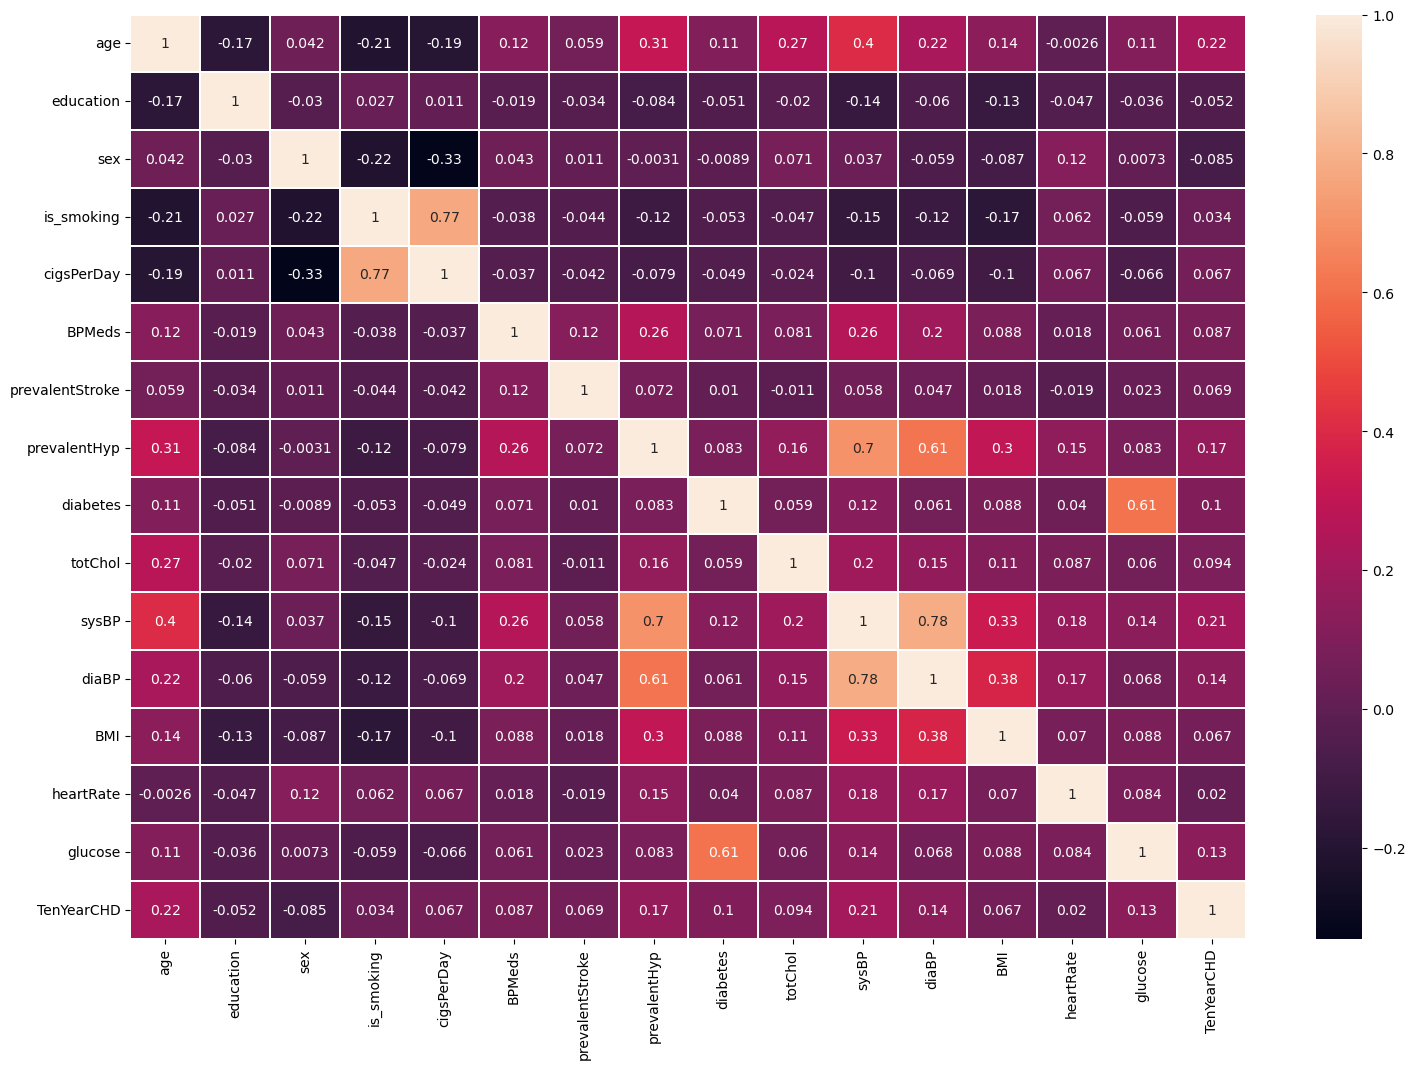

In [117]:
# Generate a heatmap to visualize the correlation matrix of the dataset
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), linewidths=0.1, annot=True)
plt.show()

#### Observations


- **is_smoking** and **cigsPerDay** are correlated with a value of **0.77** which is approximately equivalent **0.8** 
    * *Teniendo en cuenta la cantidad de cigarrillos por día, se puede eliminar is_smoking.*
    ***
- **prevalentHyp** is correlated with **diaBP** and **sysBP** with values of **0.61** and **0.7**, respectively.
- **sysBP** and **diaBP** are correlated with a value of **0.78** which is approximately equivalent **0.8**
    * *Sabiendo que sysBP tiene correlación 0.7 con prevalentHyp y 0.8 con diaBP, se pueden eliminar prevalentHyp y diaBP.* #preguntar
    ***
- **glucose** and **diabetes** are correlated with a value of **0.61**
    * *Sabiendo que al tener una glucosa elevada, se pueden determinar si es diabetico, se elimina diabetes.*

In [119]:
cols_to_drop = ["is_smoking", "prevalentHyp", "diabetes"]
data = data.drop(columns=cols_to_drop)
data.columns


Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

#### Distribution of the data

/tmp/ipykernel_428/3948888659.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = axis)


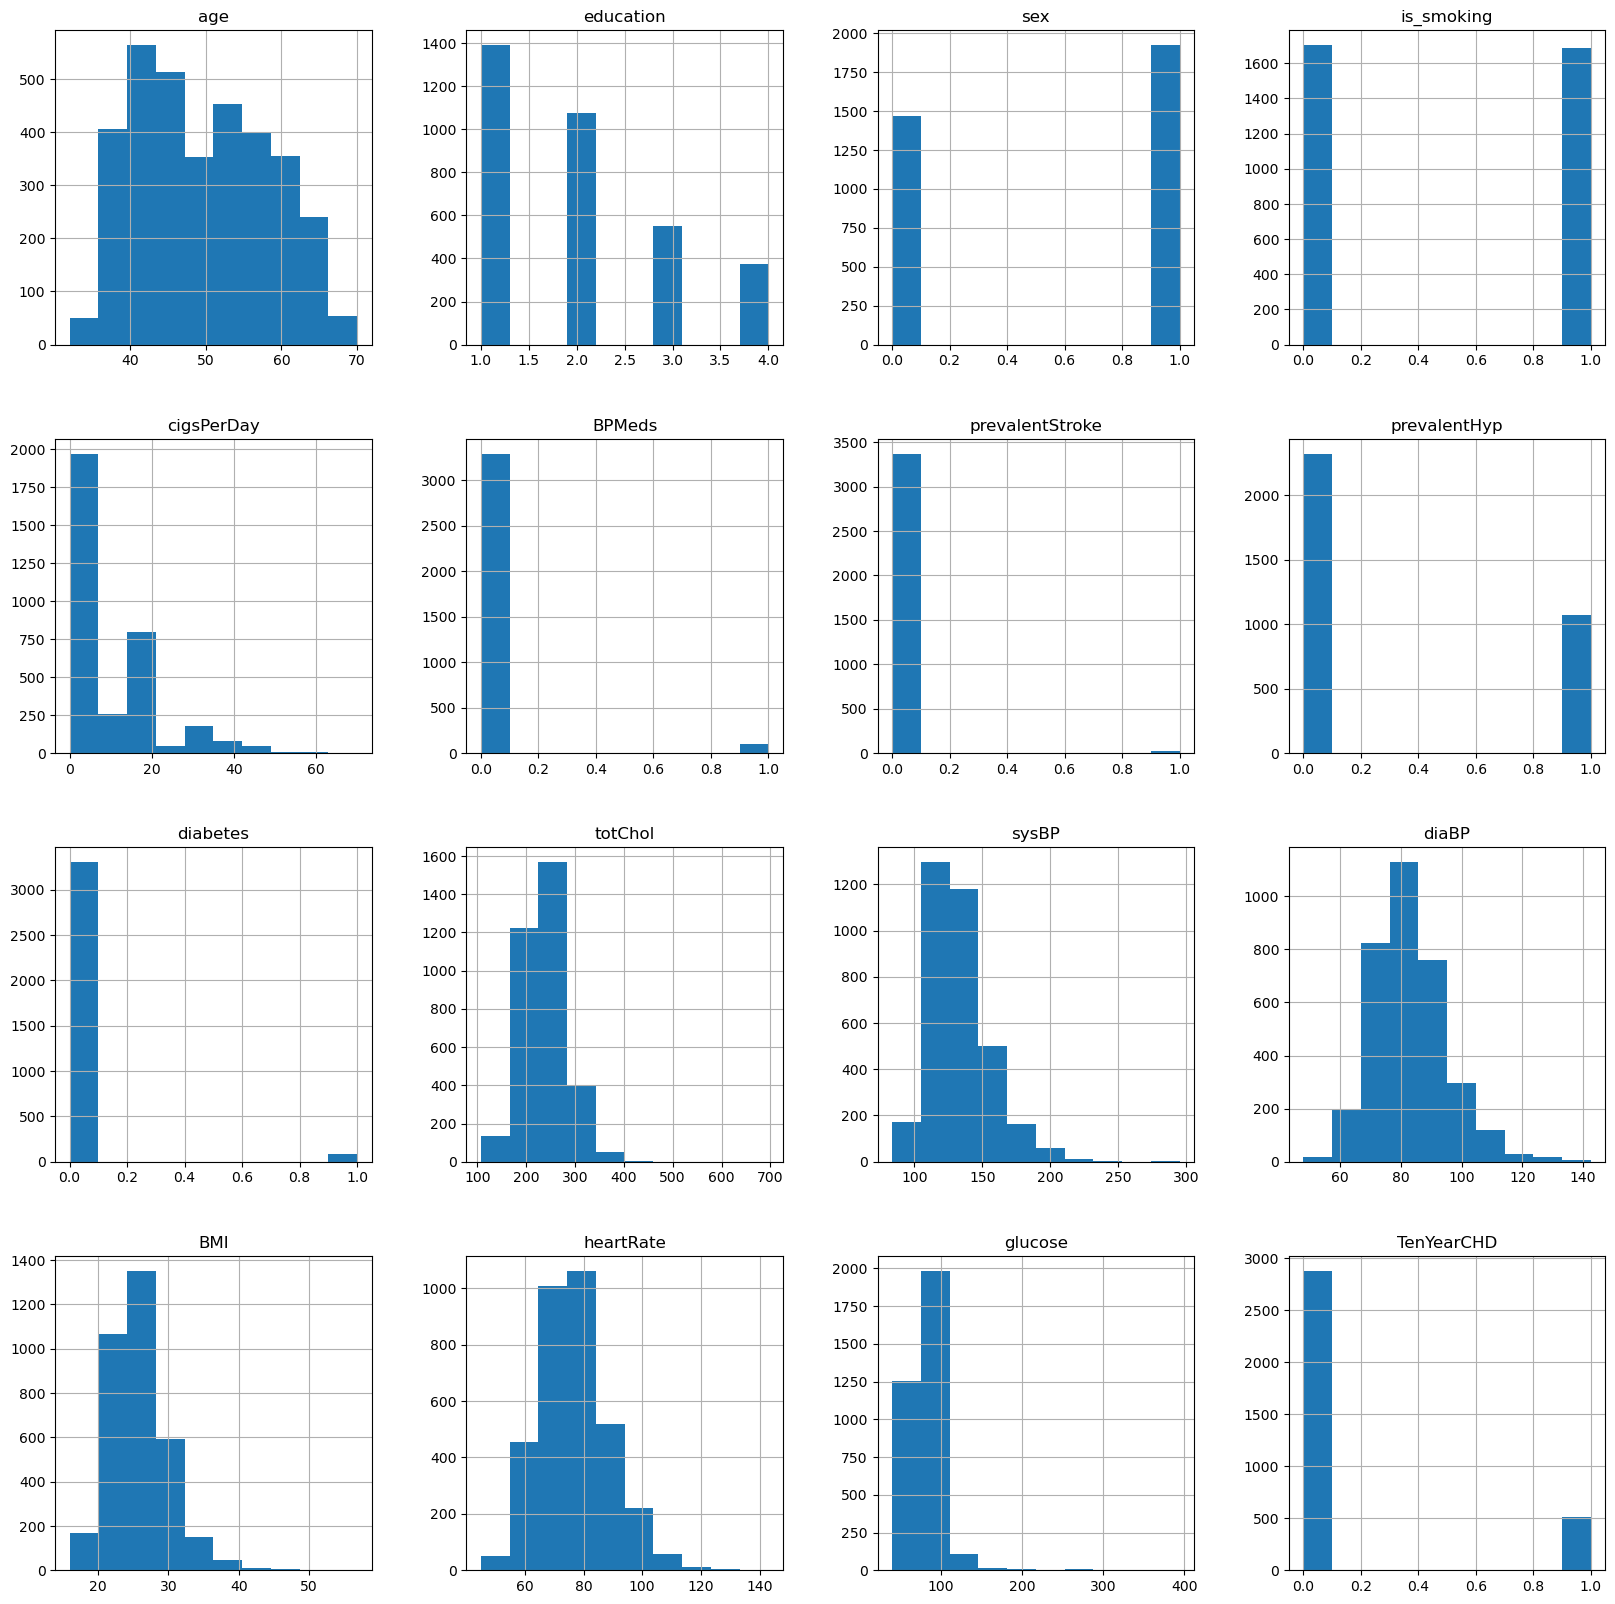

In [75]:
# Plot a histogram of the data on the axis
figure = plt.figure(figsize=(20, 20))
axis = figure.gca() # Get the current axis for the figure
data.hist(ax = axis)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

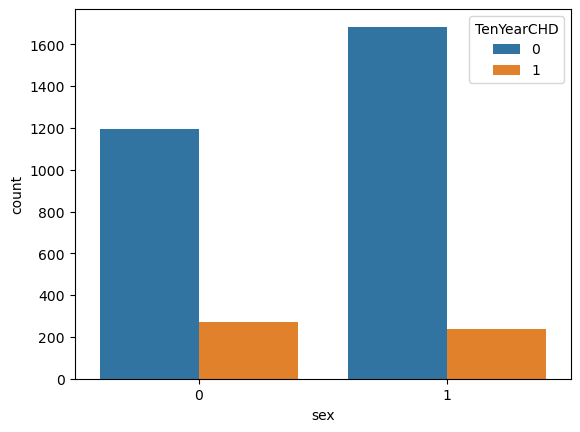

In [53]:
sns.countplot(x=data['sex'], hue=data['TenYearCHD'])